In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [107]:
personality_df = pd.read_csv(r"C:\Users\THINKPAD\Documents\Datasets\social behavior & personality types\personality_datasert.csv")

In [108]:
personality_df.shape

(2900, 8)

In [109]:
personality_df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [110]:
personality_df.head(4)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert


In [111]:
personality_df.dtypes

Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object

In [112]:
personality_df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [113]:
personality_df.duplicated().sum()

402

In [114]:
personality_df = personality_df.drop_duplicates(keep = 'first')

In [115]:
personality_df.shape

(2498, 8)

In [116]:
# cat_col - categorical columns
# num_cols - numerical columns
cat_col = [col for col in personality_df.columns if personality_df[col].dtypes == object]
num_col = [col for col in personality_df.columns if personality_df[col].dtypes != object]

In [117]:
# Statistical summary of the dataset
personality_df[num_col].describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000
mean,4.232128,4.200867,3.192954,6.580130,3.815283
std,3.406630,2.874305,2.218807,4.257516,2.914253
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,3.000000,1.000000
50%,3.000000,4.000000,3.000000,6.000000,3.000000
75%,7.000000,7.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [118]:
# Unique values for the categorical columns in the dataset
personality_df[cat_col].apply(lambda x:x.unique()).T

,0,1
Stage_fear,No,Yes
Drained_after_socializing,No,Yes
Personality,Extrovert,Introvert


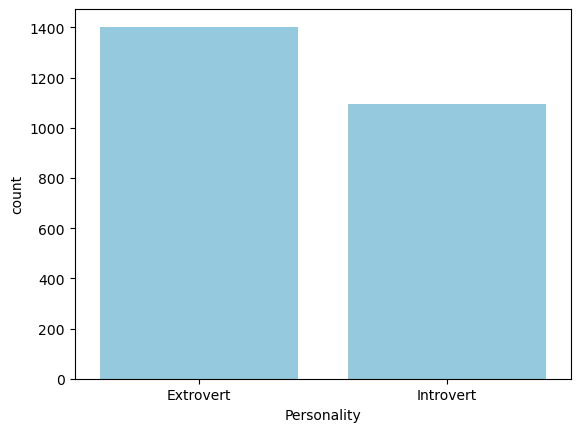

In [119]:
sns.countplot(data = personality_df, x = 'Personality', color = 'skyblue')
plt.show()

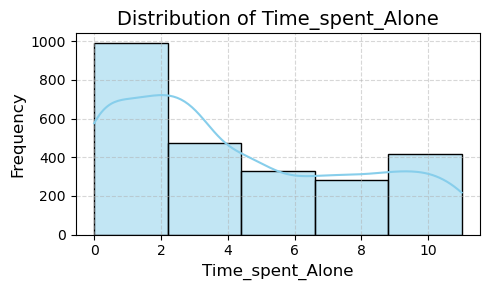

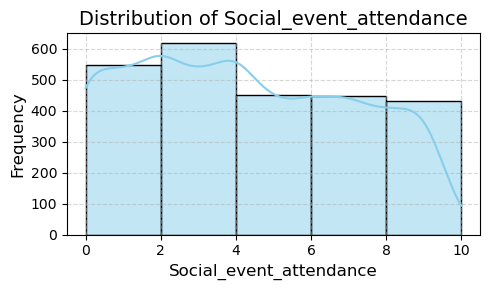

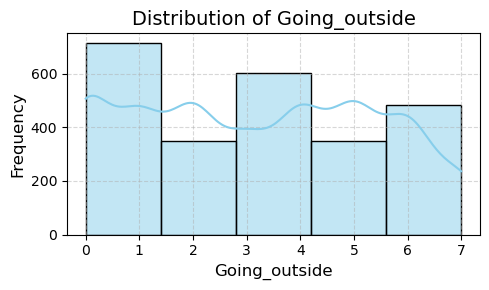

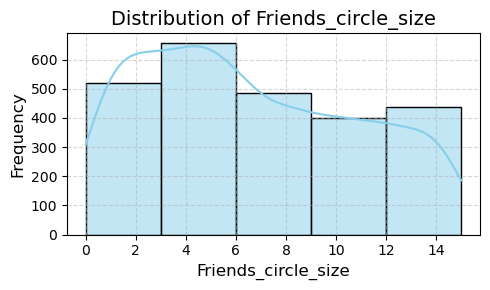

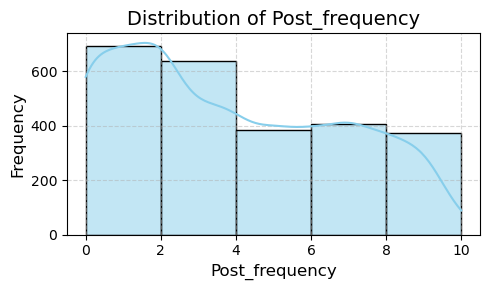

In [120]:
for col in personality_df[num_col].columns:
    plt.figure(figsize = (5,3))
    sns.histplot(
        data = personality_df, 
        kde = True,
        bins = 5,
        x = col,
        color = 'skyblue',
        edgecolor = 'black'
    )
    plt.title(f'Distribution of {col}', fontsize = 14)
    plt.xlabel(col, fontsize = 12)
    plt.ylabel('Frequency', fontsize = 12)
    plt.grid(True, linestyle = '--', alpha = 0.5)
    plt.tight_layout()
    plt.show()

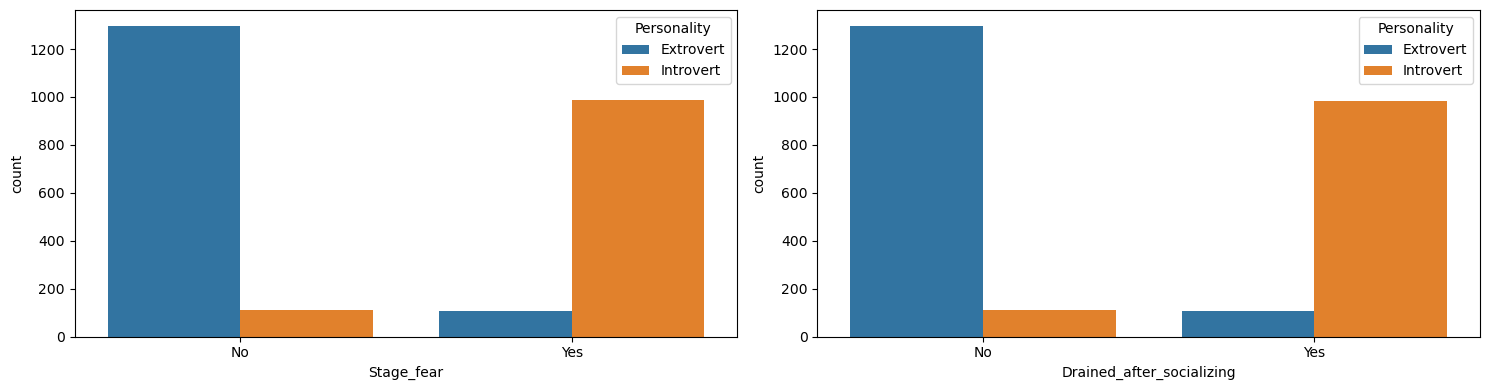

In [121]:
# Choose the first 3 categorical columns to plot
fig, ax = plt.subplots(1, 2, figsize = (15,4))
sns.countplot(data = personality_df, x = 'Stage_fear', hue = 'Personality', ax = ax[0])
sns.countplot(data = personality_df, x = 'Drained_after_socializing', hue = 'Personality', ax = ax[1])
plt.tight_layout()
plt.show()

In [122]:
personality_df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

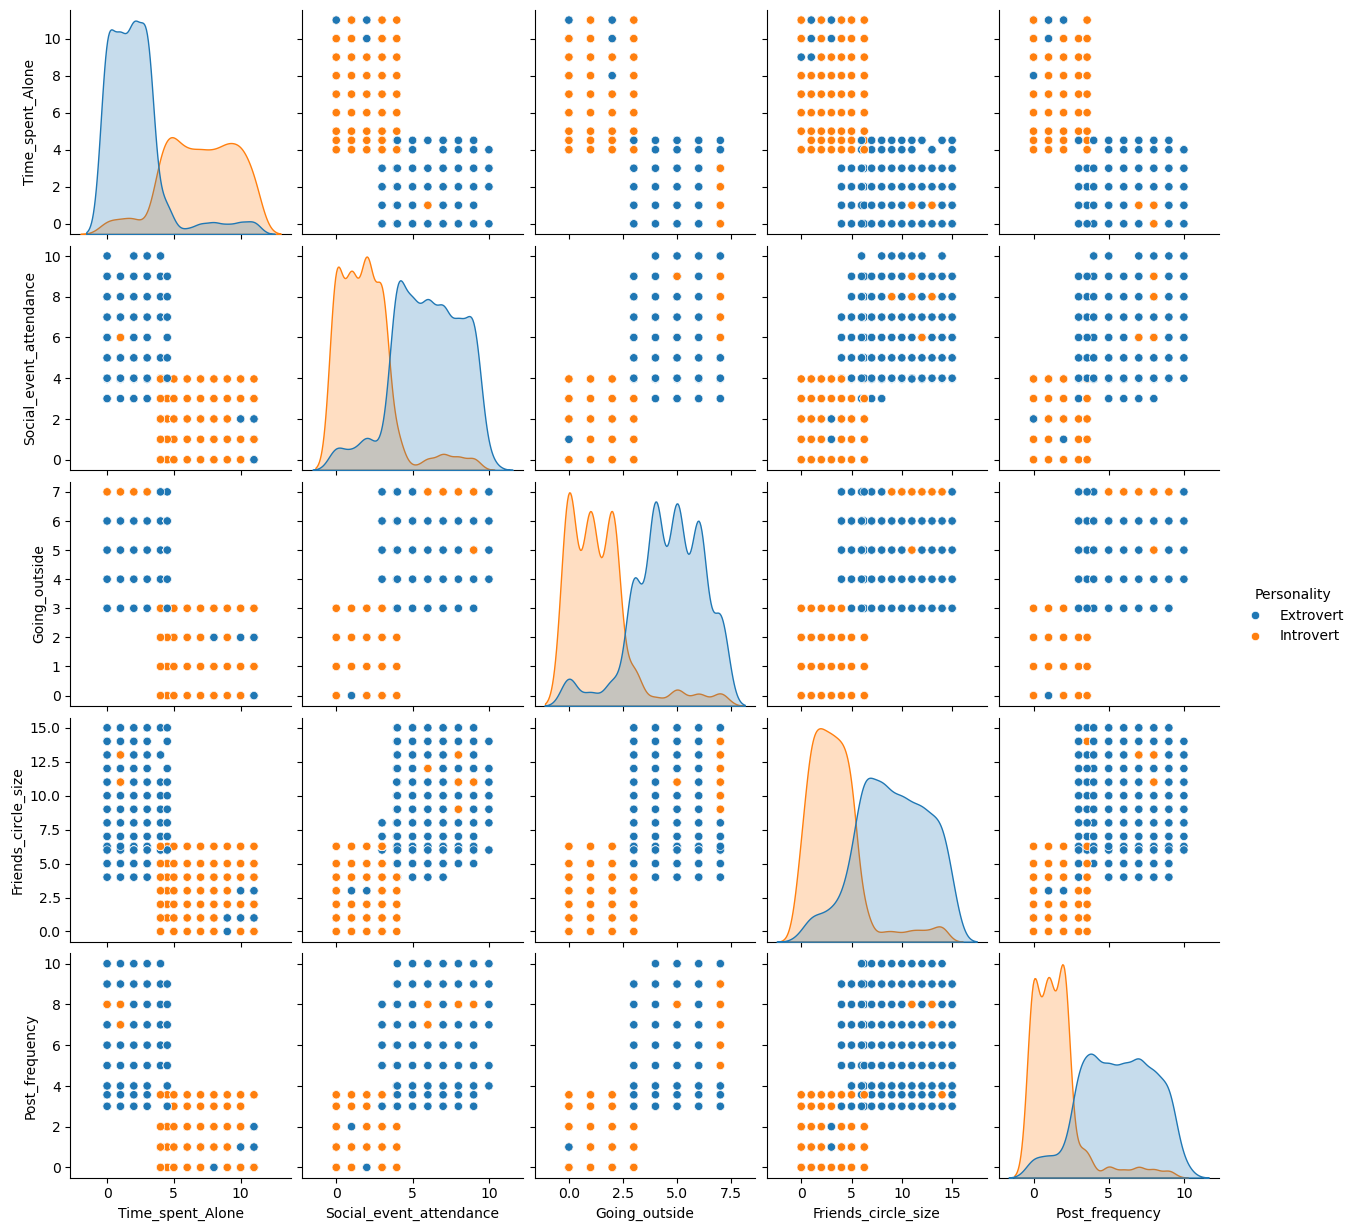

In [123]:
sns.pairplot(data = personality_df.drop(['Stage_fear', 'Drained_after_socializing'], axis = 1), hue = 'Personality')
plt.show()

In [124]:
personality_df.corr(numeric_only = True)

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Time_spent_Alone,1.000000,-0.717585,-0.733913,-0.698716,-0.709264
Social_event_attendance,-0.717585,1.000000,0.719483,0.706114,0.710030
Going_outside,-0.733913,0.719483,1.000000,0.707923,0.741060
Friends_circle_size,-0.698716,0.706114,0.707923,1.000000,0.672576
Post_frequency,-0.709264,0.710030,0.741060,0.672576,1.000000


In [125]:
encoded_cat_cols = pd.get_dummies(personality_df[cat_col].drop('Personality', axis = 1), drop_first=True, dtype='int')

In [126]:
personality_df = pd.concat([personality_df, encoded_cat_cols], axis = 1)

In [127]:
personality_df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Stage_fear_Yes,Drained_after_socializing_Yes
0,4.0,No,4.0,6.0,No,13.0,5.000000,Extrovert,0,0
1,9.0,Yes,0.0,0.0,Yes,0.0,3.000000,Introvert,1,1
2,9.0,Yes,1.0,2.0,Yes,5.0,2.000000,Introvert,1,1
3,0.0,No,6.0,7.0,No,14.0,8.000000,Extrovert,0,0
4,3.0,No,9.0,4.0,No,8.0,5.000000,Extrovert,0,0
...,...,...,...,...,...,...,...,...,...,...
2894,0.0,No,9.0,3.0,No,12.0,3.564727,Extrovert,0,0
2896,3.0,No,8.0,3.0,No,14.0,9.000000,Extrovert,0,0
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.000000,Introvert,1,1
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.000000,Introvert,1,1


In [128]:
X = personality_df.drop(['Personality', 'Stage_fear', 'Drained_after_socializing'], axis = 1)

y = personality_df['Personality']

In [129]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Model Training, Prediction and Evaluation

In [131]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=101),
    "Gradient Boosting": GradientBoostingClassifier()
}


 Training: Logistic Regression
 Accuracy: 0.9180

 Classification Report:
               precision    recall  f1-score   support

   Extrovert       0.91      0.94      0.92       269
   Introvert       0.92      0.90      0.91       231

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



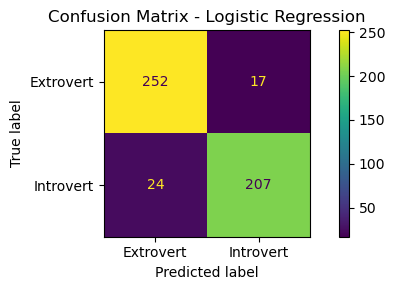


 Training: Random Forest
 Accuracy: 0.9100

 Classification Report:
               precision    recall  f1-score   support

   Extrovert       0.91      0.93      0.92       269
   Introvert       0.91      0.89      0.90       231

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



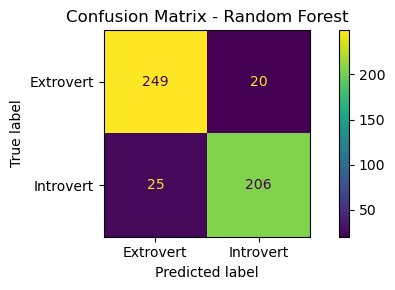


 Training: Gradient Boosting
 Accuracy: 0.9440

 Classification Report:
               precision    recall  f1-score   support

   Extrovert       0.96      0.93      0.95       269
   Introvert       0.92      0.96      0.94       231

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



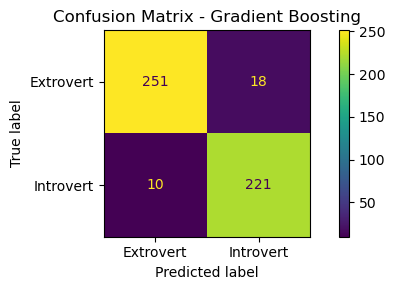

In [139]:
results = {}

for name, model in models.items():
    print(f'\n Training: {name}')

    # model fitting
    model.fit(X_train, y_train)
    
    # model prediction 
    y_pred = model.predict(X_test)

    # model evaluation
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f" Accuracy: {acc:.4f}")
    print("\n Classification Report:\n", classification_report(y_test, y_pred, target_names=['Extrovert', 'Introvert']))

    fig, ax = plt.subplots(figsize=(6, 3))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax = ax)
    plt.title(f'Confusion Matrix - {name}')
    plt.tight_layout()
    plt.show()

In [141]:
model_results_df = pd.DataFrame(
    data = results.items(),
    columns = ['Model Name', 'Accuracy']
)

model_results_df.sort_values(by = 'Accuracy', ascending=False)

,Model Name,Accuracy
2,Gradient Boosting,0.944
0,Logistic Regression,0.918
1,Random Forest,0.910


In [148]:
# Feature Importance

feature_imp_df = pd.DataFrame(
    models['Gradient Boosting'].feature_importances_,
    index = X.columns,
    columns = ['Feat Importance']
)

In [149]:
feature_imp_df.sort_values(by = 'Feat Importance', ascending=False)

,Feat Importance
Drained_after_socializing_Yes,0.881888
Post_frequency,0.061836
Friends_circle_size,0.016059
Time_spent_Alone,0.014941
Social_event_attendance,0.014744
Going_outside,0.010326
Stage_fear_Yes,0.000206
